In [1]:
from coffea import util

import awkward as ak
import uproot

import time

import numpy as np
import itertools

import hist
import hist.intervals
s = hist.tag.Slicer()

import matplotlib.pyplot as plt
from cycler import cycler

import warnings
warnings.filterwarnings("ignore")

In [2]:
wc_dict = {'cHj1':r'$c_{Hj1}$','cHj3':r'$c_{Hj3}$',
           'cHW':r'$c_{HW}$','cHWtil':r'$\tilde{c}_{HW}$',
           'cHbox':r'$c_{Hbox}$','cHDD':r'$c_{HDD}$',
           'cHu':r'$c_{Hu}$','cHd':r'$c_{Hd}$',
           'cHB':r'$c_{HB}$','cHBtil':r'$\tilde{c}_{HB}$',
           'cHWB':r'$c_{HWB}$','cHWBtil':r'$\tilde{c}_{HWB}$',
           'cHudRe':r'$Re(c_{Hud})$','cHudIm':r'$Im(c_{Hud})$',
           'cuWRe':r'$Re(c_{uW})$',r'cuWIm':r'$Im(c_{uW})$',
           'cdWRe':r'$Re(c_{dW})$',
           #'cdWIm':r'$Im(c_{dW})$', # missing!
           'cuBRe':r'$Re(c_{uB})$','cuBIm':r'$Im(c_{uB})$',
           'cdBRe':r'$Re(c_{dB})$','cdBIm':r'$Im(c_{dB})$'
          }

parameters = wc_dict.keys()

In [3]:
zhfile = "coffea/ZH_STXS_Reweighted.coffea"
zh = util.load(zhfile)

In [4]:
whfile = "coffea/WH_STXS_Reweighted.coffea"
wh = util.load(whfile)

In [19]:
def plot_pt_stack(smin,label):
    
    var = smin.axes[0].name
    
    sm = smin.values()/(10**6)
    sm_err = np.sqrt(smin.variances())/(10**6)
    
    print(sm.shape)
    
    the_bins = smin.axes[0].edges

    fig, ax = plt.subplots(1,1)
    plt.suptitle(label)
    
    if len(sm.shape) > 1:
        
        sm = sm[:,3:]
        
        bin_centers = [the_bins[:-1] + 0.5*np.diff(the_bins) for i in range(sm.shape[1])]
        plt.hist(bin_centers,bins=the_bins,weights=sm,stacked=True)#,
                #label=smin.axes[1].edges[:-1][3:])
    else:
        bin_centers = the_bins[:-1] + 0.5*np.diff(the_bins)
        plt.hist(bin_centers,bins=the_bins,weights=sm,histtype='step',lw=2,color='blue')
        plt.errorbar(bin_centers, sm, yerr=sm_err, linestyle='', lw=2, color='blue')
    
    plt.xlabel(r'STXS Stage 1.2 fine bins',fontsize=18,multialignment='center')
    plt.ylabel('Fraction of events',fontsize=18,multialignment='center')    
    #plt.yscale('log')
    
    fig.legend(frameon=False, fontsize=18, bbox_to_anchor=(1.4,0.9),
              labels=["300-400","400-500","500-600","600-800",">800"])
    
#    plotdir = "noteplots/"+wc+"/"
#    if not os.path.exists(plotdir):
#        os.mkdir(plotdir)
#    fig.savefig(plotdir+"overlay_"+var+"_"+wc+".png",bbox_inches='tight')
#    fig.savefig(plotdir+"overlay_"+var+"_"+wc+".pdf",bbox_inches='tight')


(25, 8)


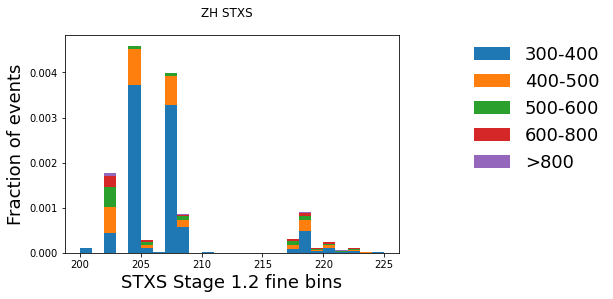

In [20]:
myhist = zh['pth'][{'wc':'SM'}]
plot_pt_stack(myhist, r'ZH STXS')

(25, 8)


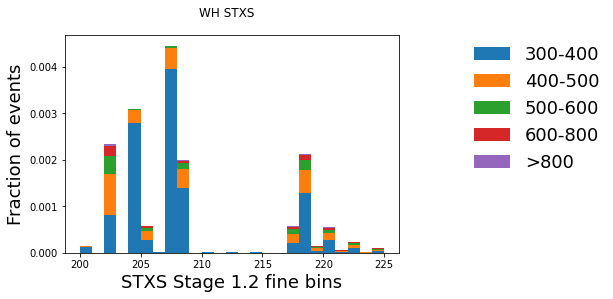

In [21]:
myhist = wh['pth'][{'wc':'SM'}]
plot_pt_stack(myhist, r'WH STXS')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(25,)
(25,)


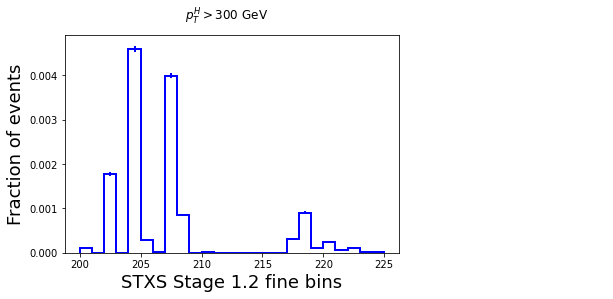

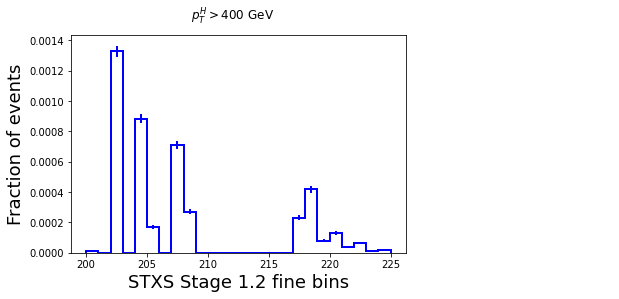

In [14]:
myhist = zh['pth'][{'wc':'SM','hpt':s[3:hist.overflow:sum]}]
plot_pt_stack(myhist, r'$p_T^H > 300$ GeV')
myhist = zh['pth'][{'wc':'SM','hpt':s[4:hist.overflow:sum]}]
plot_pt_stack(myhist, r'$p_T^H > 400$ GeV')

No handles with labels found to put in legend.


(25,)


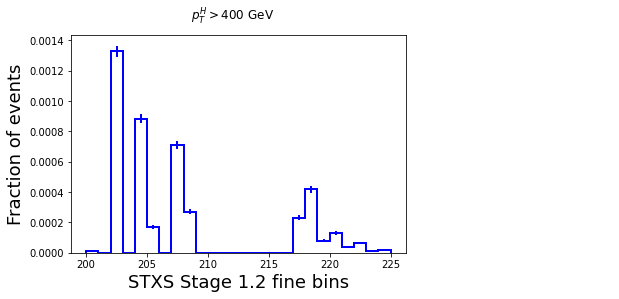

No handles with labels found to put in legend.


(25,)


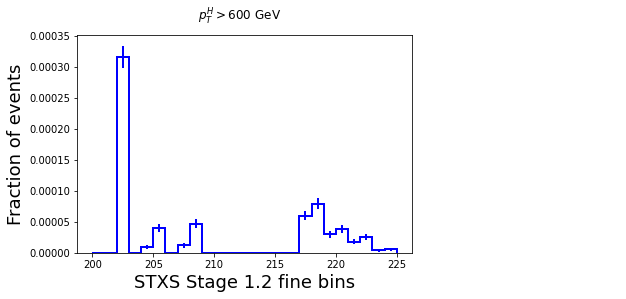

In [12]:
myhist = zh['pth'][{'wc':'SM','hpt':s[6:hist.overflow:sum]}]
plot_pt_stack(myhist, r'$p_T^H > 600$ GeV')